<a href="https://colab.research.google.com/github/xihajun/Keep-learning/blob/master/code/footwear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd

import os

filelist = []
for dirname, _, filenames in os.walk('/label/'):
    for filename in filenames:
        filelist.append(os.path.join(dirname,filename))

In [0]:
!rm label -rf

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans  #导入kmeans
from sklearn.utils import shuffle
import numpy as np
from skimage import io
import warnings

In [0]:
from PIL import ImageTk, Image


img = Image.open('./13.png')
box = (0,0, 240,176)
region = img.crop(box)
region.save('./13.png')

img = Image.open('./01.png')
box = (0,0, 240,176)
region = img.crop(box)
region.save('./01.png')

In [0]:
from PIL import Image
I = Image.open('/1.png')
I.show()
L = I.convert('L')   #转化为灰度图
L = I.convert('1')   #转化为二值化图
L.save('/13.png')

In [137]:
original = plt.imread('./01.png')
label = plt.imread('./13.png')

width, height,depth = original.shape
width, height,depth

(176, 240, 3)

In [0]:
ori = np.array(original.reshape(width,height,depth), dtype=np.float64)
lab = np.array(label.reshape(width,height,1), dtype=np.float64)

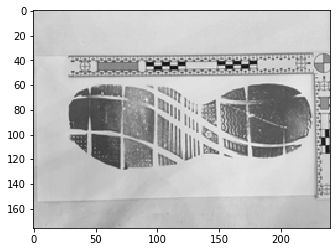

In [139]:
plt.imshow(ori)

In [0]:
import tensorflow as tf
from keras import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, UpSampling2D, Cropping2D
from keras.layers.normalization import BatchNormalization

In [0]:
model = Sequential()

model.add(Conv2D(32,kernel_size = (2,2), 
                input_shape = (width,height,depth), 
                activation = 'relu',
                padding = 'same'))
model.add(MaxPooling2D(pool_size = (2,2), padding = 'same'))

model.add(Conv2D(32,
                kernel_size = (2,2), 
                activation = 'relu',
                padding = 'same'))
model.add(MaxPooling2D(pool_size = (2,2), padding = 'same'))

model.add(Conv2D(1,
                kernel_size = (2,2), 
                activation = 'relu',
                padding = 'same'))
model.add(MaxPooling2D(pool_size = (2,2), padding = 'same'))

model.add(UpSampling2D(size=(2, 2),
    data_format=None,
    interpolation='nearest'))

model.add(UpSampling2D(size=(2, 2),
    data_format=None,
    interpolation='nearest'))

model.add(UpSampling2D(size=(2, 2),
    data_format=None,
    interpolation='nearest'))



# model.add(Cropping2D(cropping=((7,0),(7,0))))

In [142]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_34 (Conv2D)           (None, 176, 240, 32)      416       
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 88, 120, 32)       0         
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 88, 120, 32)       4128      
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 44, 60, 32)        0         
_________________________________________________________________
conv2d_36 (Conv2D)           (None, 44, 60, 1)         129       
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 22, 30, 1)         0         
_________________________________________________________________
up_sampling2d_25 (UpSampling (None, 44, 60, 1)        

In [0]:
original_list = []
original_list.append(ori)
original_list.append(ori)

predict_list = []
predict_list.append(lab)
predict_list.append(lab)

In [144]:
plt.imshow(predict_list[0][:,:,1])

IndexError: ignored

In [0]:
model.compile(optimizer='adam', loss='binary_crossentropy')

In [151]:
model.fit(np.array(original_list),np.array(predict_list),epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 42ms/step - loss: 0.3553
Epoch 2/100
2/2 [==============================] - 0s 39ms/step - loss: 0.3532
Epoch 3/100
2/2 [==============================] - 0s 40ms/step - loss: 0.3510
Epoch 4/100
2/2 [==============================] - 0s 42ms/step - loss: 0.3490
Epoch 5/100
2/2 [==============================] - 0s 41ms/step - loss: 0.3466
Epoch 6/100
2/2 [==============================] - 0s 40ms/step - loss: 0.3443
Epoch 7/100
2/2 [==============================] - 0s 40ms/step - loss: 0.3420
Epoch 8/100
2/2 [==============================] - 0s 40ms/step - loss: 0.3407
Epoch 9/100
2/2 [==============================] - 0s 40ms/step - loss: 0.3386
Epoch 10/100
2/2 [==============================] - 0s 40ms/step - loss: 0.3360
Epoch 11/100
2/2 [==============================] - 0s 42ms/step - loss: 0.3341
Epoch 12/100
2/2 [==============================] - 0s 42ms/step - loss: 0.3322
Epoch 13/100
2/2 [==============================]

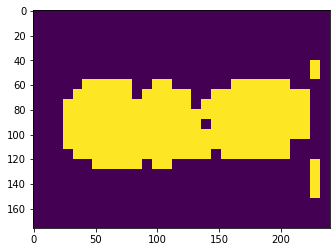

In [152]:
plt.imshow(model.predict_classes(np.array(original_list))[0].reshape(width,height))

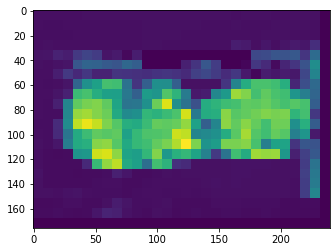

In [153]:
plt.imshow(model.predict(np.array(original_list))[0].reshape(width,height))

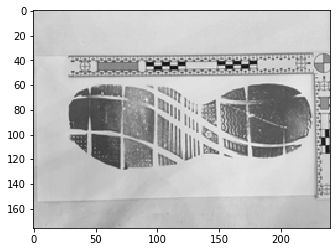

In [155]:
plt.imshow(ori)

In [0]:
img = Image.open('./2.png')
box = (0,0, 240,176)
region = img.crop(box)
region.save('./2.png')

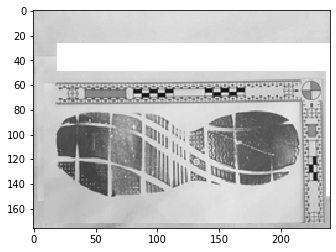

In [164]:
predic = plt.imread('./2.png')
plt.imshow(predic)

(176, 240, 3)

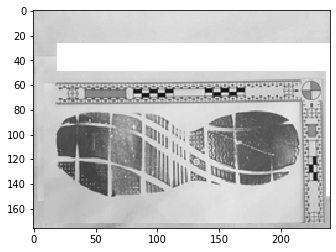

In [178]:

x = np.delete(predic,3, axis = 2)
plt.imshow(x)
x.shape

In [0]:

predict_list = []
predict_list.append(x)
predict_list.append(x)

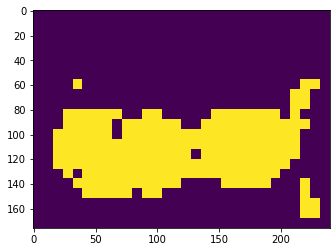

In [183]:
plt.imshow(model.predict_classes(np.array(predict_list))[0].reshape(width,height))

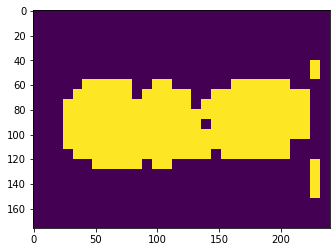

In [184]:
plt.imshow(model.predict_classes(np.array(original_list))[0].reshape(width,height))

In [0]:
def crop_img(filename):
  img = Image.open(filename)
  box = (0,0, 240,176)
  region = img.crop(box)
  region.save(filename)
  pred =  plt.imread(filename)
  x = np.delete(pred, 3, axis = 2)
  predict_list = []
  predict_list.append(x)
  predict_list.append(x)
  return predict_list

In [0]:
pl = crop_img('./02.png')

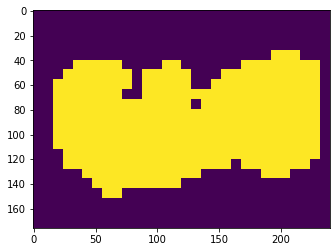

In [201]:
plt.imshow(model.predict_classes(np.array(pl))[0].reshape(width,height))

In [0]:
!pip install python-resize-image

In [0]:
from resizeimage import resizeimage
filename = '03.jpg'
with open(filename, 'rb') as f:
      with Image.open(f) as image:
          cover = resizeimage.resize_cover(image, [176, 240])
          cover.save(filename, image.format)



In [207]:
width, height

(176, 240)

In [0]:
def resize(filename):
  img = Image.open(filename)
  img = img.resize((240,176))
  img.save(filename)
  x =  plt.imread(filename)
  x = np.delete(x, 3, axis = 2)
  predict_list = []
  predict_list.append(x)
  predict_list.append(x)
  return predict_list

In [0]:
ppp = resize('09.png')